# EDA for merged dataset

## EDA Overview

- Dataset Overview → shape, missing values, summary stats.

- Univariate Analysis → distribution of sales and key features.

- Correlation Analysis → heatmap between sales & features.

- Time-Series Trends → sales trend over time.

- Holiday Effect → sales on holidays vs non-holidays.

- Markdown & Fuel Impact → effect of markdowns and fuel price on sales.

- Department-Level Analysis → top-performing departments.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load Dataset

In [3]:
df = pd.read_csv("../data/merged/merged_dataset.csv")

In [4]:
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Year_x,Month_x,Week_x,DayOfWeek_x,lag_1,...,Fuel_Price_30d_avg,CPI_7d_avg,CPI_30d_avg,Unemployment_7d_avg,Unemployment_30d_avg,Size,Type_A,Type_B,Type_C,Size_log
0,1,1,2010-02-05,24924.50,False,2010,2,5,4,NaN,...,2.572000,211.096358,211.096358,8.106,8.106,151315.0,True,False,False,11.927126
1,1,1,2010-02-12,46039.49,True,2010,2,6,4,24924.50,...,2.560000,211.169264,211.169264,8.106,8.106,151315.0,True,False,False,11.927126
2,1,1,2010-02-19,41595.55,False,2010,2,7,4,46039.49,...,2.544667,211.209224,211.209224,8.106,8.106,151315.0,True,False,False,11.927126
3,1,1,2010-02-26,19403.54,False,2010,2,8,4,41595.55,...,2.548750,211.236828,211.236828,8.106,8.106,151315.0,True,False,False,11.927126
4,1,1,2010-03-05,21827.90,False,2010,3,9,4,19403.54,...,2.564000,211.259491,211.259491,8.106,8.106,151315.0,True,False,False,11.927126


In [5]:
df.shape

(421570, 41)

In [6]:
df.dtypes

Store                     int64
Dept                      int64
Date                     object
Weekly_Sales            float64
IsHoliday                  bool
Year_x                    int64
Month_x                   int64
Week_x                    int64
DayOfWeek_x               int64
lag_1                   float64
lag_7                   float64
lag_30                  float64
rolling_7               float64
rolling_30              float64
Unnamed: 0                int64
Temperature             float64
Fuel_Price              float64
MarkDown1               float64
MarkDown2               float64
MarkDown3               float64
MarkDown4               float64
MarkDown5               float64
CPI                     float64
Unemployment            float64
Year_y                    int64
Month_y                   int64
Week_y                    int64
DayOfWeek_y               int64
Temperature_7d_avg      float64
Temperature_30d_avg     float64
Fuel_Price_7d_avg       float64
Fuel_Pri

In [8]:
df.describe(include = 'all')

,Store,Dept,Date,Weekly_Sales,IsHoliday,Year_x,Month_x,Week_x,DayOfWeek_x,lag_1,...,Fuel_Price_30d_avg,CPI_7d_avg,CPI_30d_avg,Unemployment_7d_avg,Unemployment_30d_avg,Size,Type_A,Type_B,Type_C,Size_log
count,421570.000000,421570.000000,421570,421570.000000,421570,421570.000000,421570.000000,421570.000000,421570.0,418239.000000,...,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570,421570,421570,421570.000000
unique,NaN,NaN,143,NaN,2,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2,2,2,NaN
top,NaN,NaN,2011-12-23,NaN,False,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,True,False,False,NaN
freq,NaN,NaN,3027,NaN,391909,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,215478,258075,378973,NaN
mean,22.200546,44.260317,NaN,15981.258123,NaN,2010.968591,6.449510,25.826762,4.0,15999.603935,...,3.346918,171.354962,171.813198,7.977656,7.991126,136727.915739,NaN,NaN,NaN,11.682890
std,12.785297,30.492054,NaN,22711.183519,NaN,0.796876,3.243217,14.151887,0.0,22727.073873,...,0.369593,38.571509,36.615770,1.833840,1.739782,60980.583328,NaN,NaN,NaN,0.590648
min,1.000000,1.000000,NaN,-4988.940000,NaN,2010.000000,1.000000,1.000000,4.0,-4988.940000,...,2.544667,126.091258,126.214092,3.963857,4.141100,34875.000000,NaN,NaN,NaN,10.459554
25%,11.000000,18.000000,NaN,2079.650000,NaN,2010.000000,4.000000,14.000000,4.0,2090.030000,...,3.039800,132.540954,133.804285,6.925000,7.037167,93638.000000,NaN,NaN,NaN,11.447202
50%,22.000000,37.000000,NaN,7612.030000,NaN,2011.000000,6.000000,26.000000,4.0,7625.990000,...,3.410467,182.332821,179.737819,7.885857,7.890967,140167.000000,NaN,NaN,NaN,11.850597
75%,33.000000,74.000000,NaN,20205.852500,NaN,2012.000000,9.000000,38.000000,4.0,20226.575000,...,3.622433,211.825382,210.796754,8.567000,8.540600,202505.000000,NaN,NaN,NaN,12.218525


##  Univariate Analysis

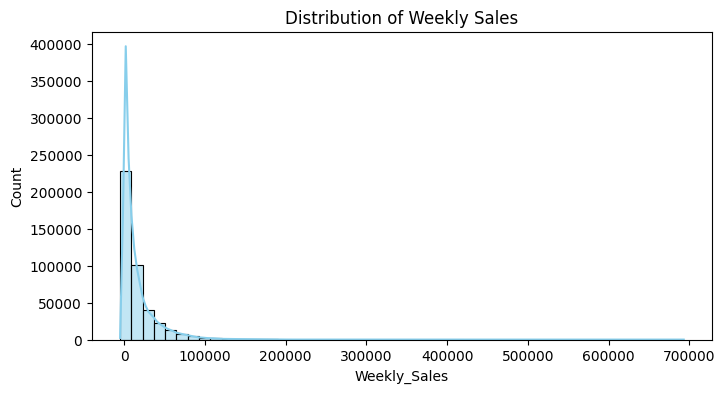

In [9]:
plt.figure(figsize=(8,4))
sns.histplot(df["Weekly_Sales"], bins=50, kde=True, color="skyblue")
plt.title("Distribution of Weekly Sales")
plt.show()

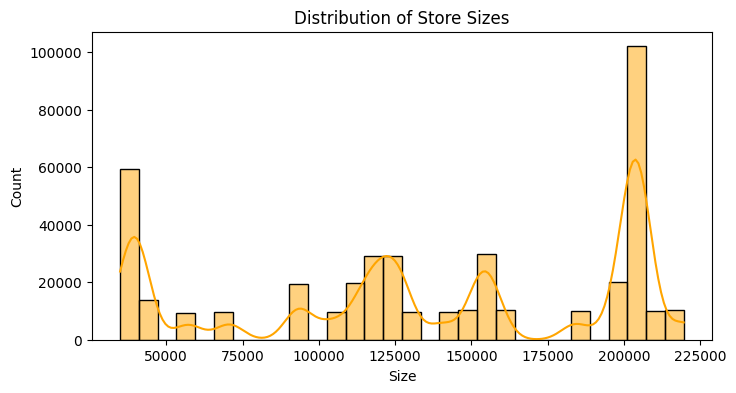

In [10]:
plt.figure(figsize=(8,4))
sns.histplot(df["Size"], bins=30, kde=True, color="orange")
plt.title("Distribution of Store Sizes")
plt.show()

##  Correlation Heatmap

In [11]:
num_cols = ["Weekly_Sales","Temperature","Fuel_Price","CPI",
            "Unemployment","Size","MarkDown1","MarkDown2","MarkDown3",
            "MarkDown4","MarkDown5"]

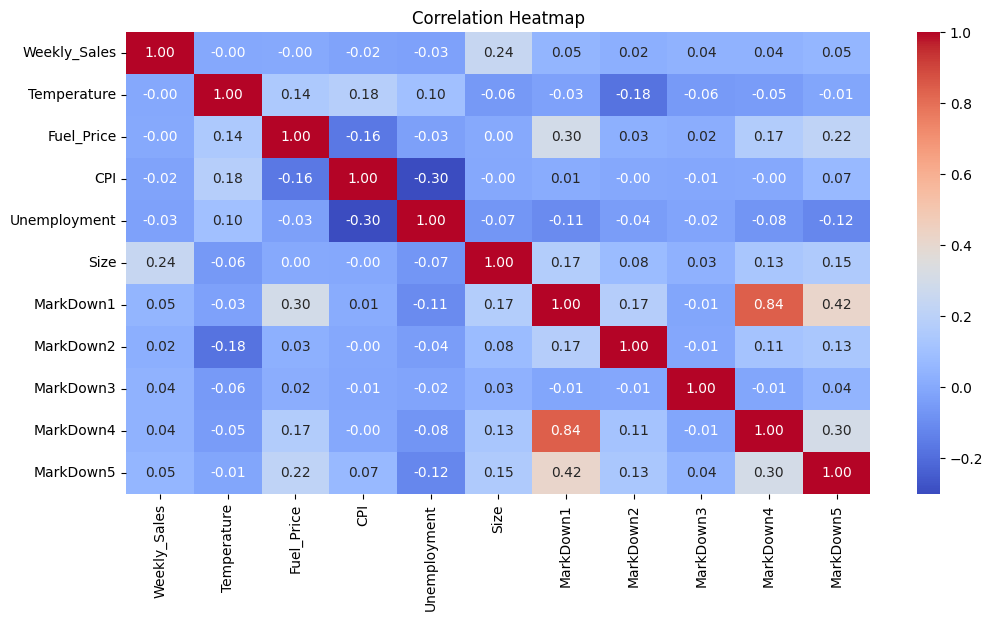

In [12]:
plt.figure(figsize=(12,6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

## Time-Series Sales Trend

In [13]:
df["Date"] = pd.to_datetime(df["Date"])
sales_trend = df.groupby("Date")["Weekly_Sales"].sum()

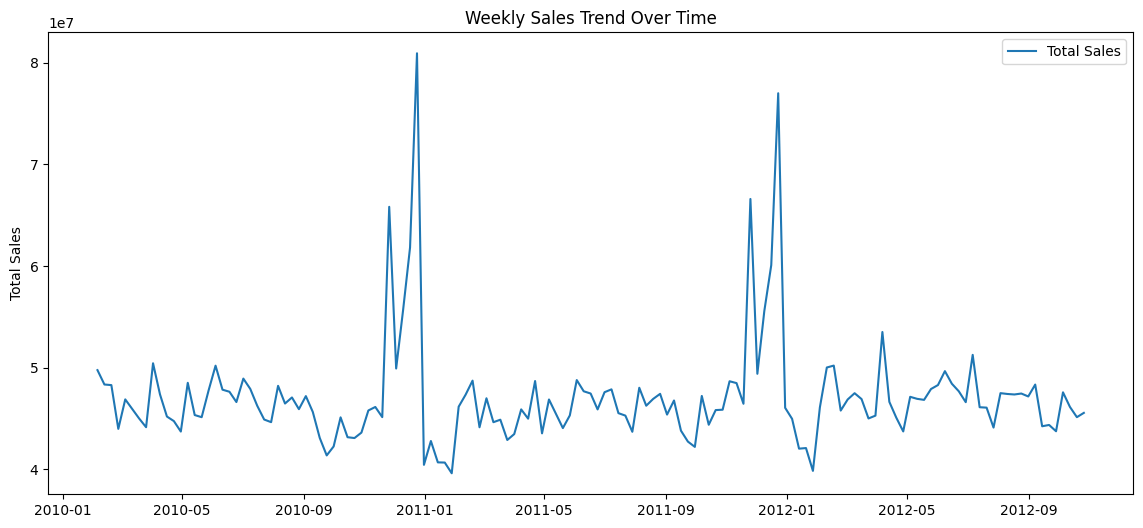

In [ ]:
plt.figure(figsize=(14,6))
plt.plot(sales_trend.index, sales_trend.values, label="Total Sales")
plt.title("Weekly Sales Trend Over Time")
plt.ylabel("Total Sales")
plt.legend()
plt.show()

## Holiday Effect

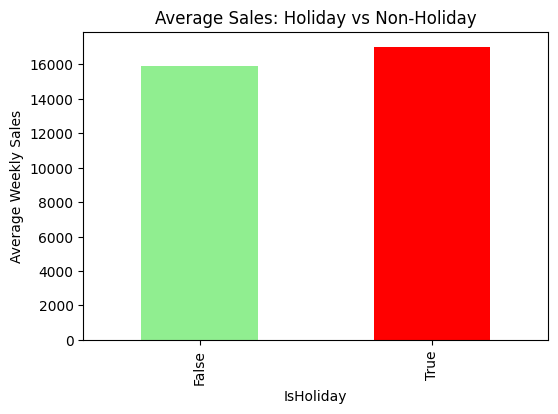

In [15]:
holiday_sales = df.groupby("IsHoliday")["Weekly_Sales"].mean()
holiday_sales.plot(kind="bar", color=["lightgreen","red"], figsize=(6,4))
plt.title("Average Sales: Holiday vs Non-Holiday")
plt.ylabel("Average Weekly Sales")
plt.show()

## Store-Level Analysis

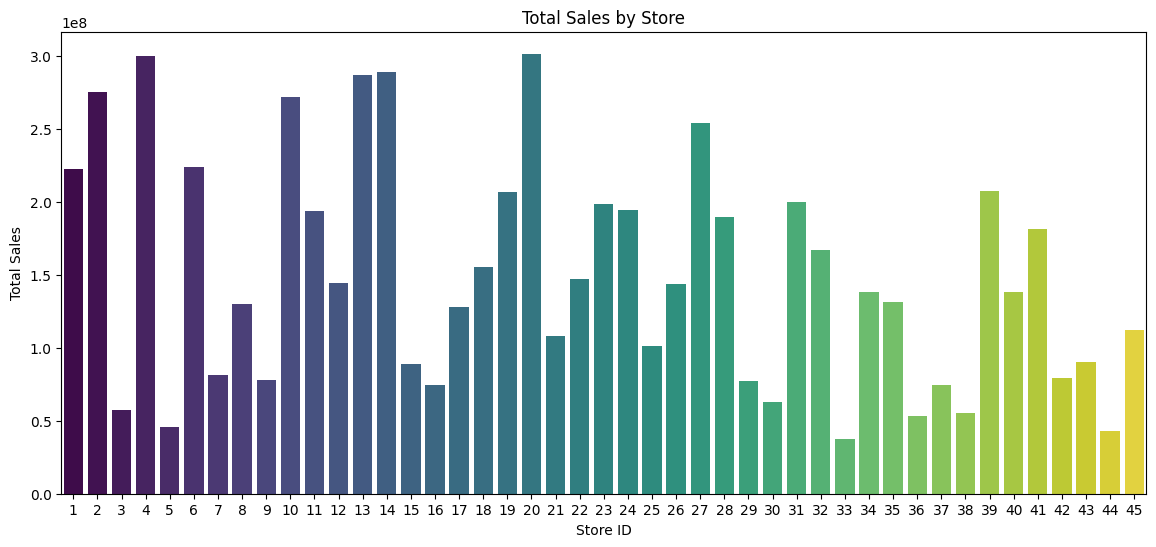

In [17]:
store_sales = df.groupby("Store")["Weekly_Sales"].sum().sort_values(ascending=False)
plt.figure(figsize=(14,6))
sns.barplot(x=store_sales.index, y=store_sales.values, hue = store_sales.index, legend = False, palette="viridis")
plt.title("Total Sales by Store")
plt.xlabel("Store ID")
plt.ylabel("Total Sales")
plt.show()

##  Sales vs Store Size

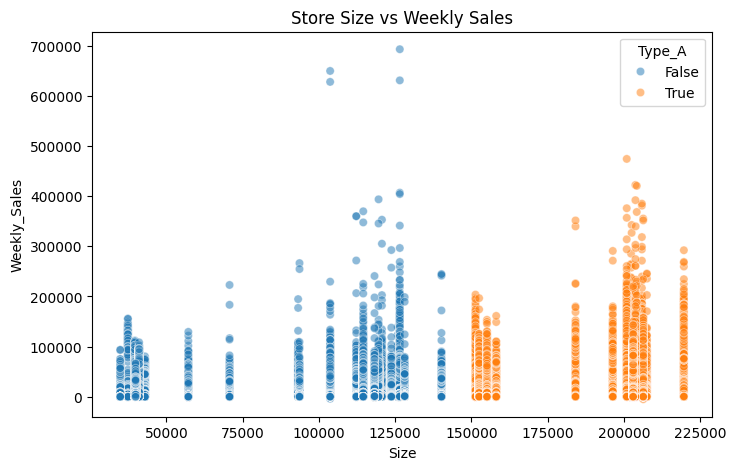

In [19]:
plt.figure(figsize=(8,5))
sns.scatterplot(x="Size", y="Weekly_Sales", hue="Type_A", data=df, alpha=0.5)
plt.title("Store Size vs Weekly Sales")
plt.show()

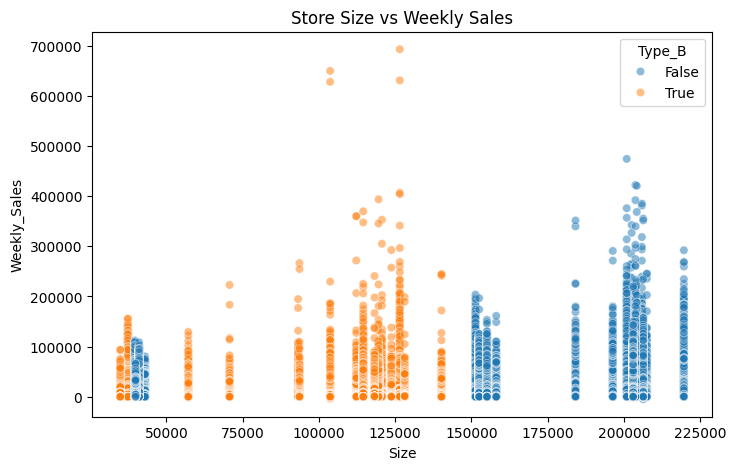

In [20]:
plt.figure(figsize=(8,5))
sns.scatterplot(x="Size", y="Weekly_Sales", hue="Type_B", data=df, alpha=0.5)
plt.title("Store Size vs Weekly Sales")
plt.show()

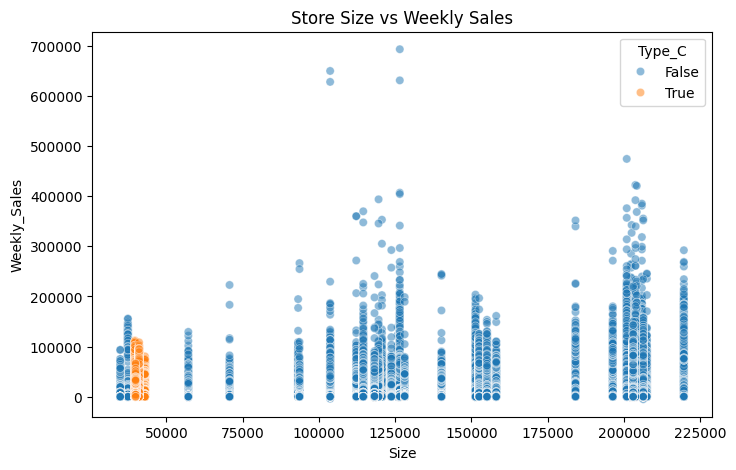

In [21]:
plt.figure(figsize=(8,5))
sns.scatterplot(x="Size", y="Weekly_Sales", hue="Type_C", data=df, alpha=0.5)
plt.title("Store Size vs Weekly Sales")
plt.show()

## Markdown & Fuel Impact

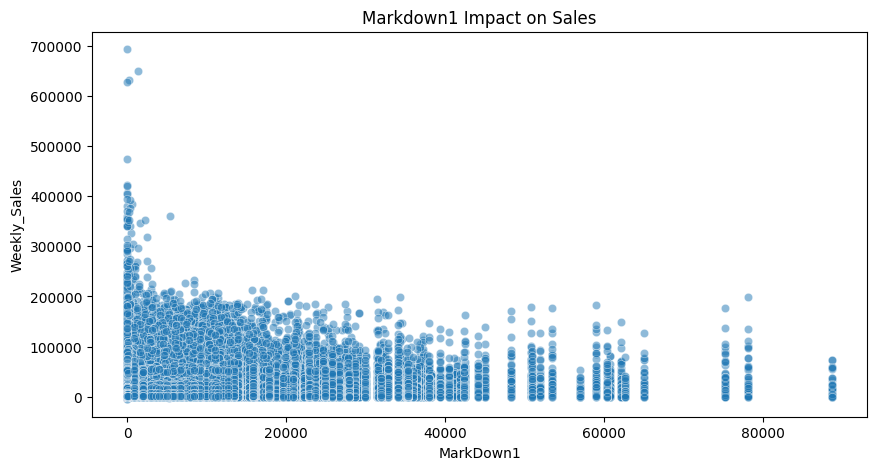

In [22]:
plt.figure(figsize=(10,5))
sns.scatterplot(x="MarkDown1", y="Weekly_Sales", data=df, alpha=0.5)
plt.title("Markdown1 Impact on Sales")
plt.show()

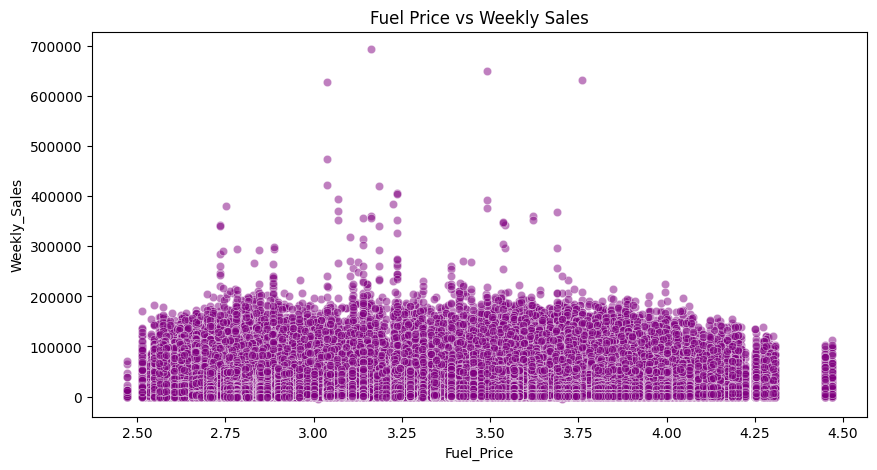

In [23]:
plt.figure(figsize=(10,5))
sns.scatterplot(x="Fuel_Price", y="Weekly_Sales", data=df, alpha=0.5, color="purple")
plt.title("Fuel Price vs Weekly Sales")
plt.show()

##  Department-Level Analysis

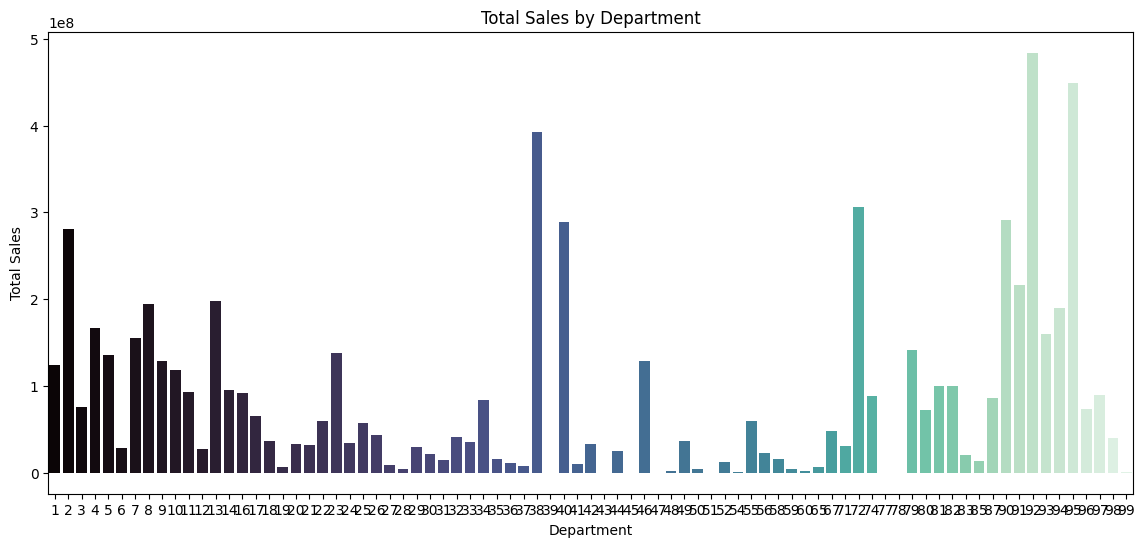

In [25]:
dept_sales = df.groupby("Dept")["Weekly_Sales"].sum().sort_values(ascending=False)
plt.figure(figsize=(14,6))
sns.barplot(x=dept_sales.index, y=dept_sales.values, hue = dept_sales.index , legend = False  , palette="mako")
plt.title("Total Sales by Department")
plt.xlabel("Department")
plt.ylabel("Total Sales")
plt.show()

## Summary of EDA

- Summary & missing values check.

- Distribution plots for sales & store size.

- Correlation heatmap → see how CPI, Unemployment, Fuel, etc. relate to sales.

- Sales trends over time.

- Holiday vs non-holiday sales comparison.

- Store-wise and department-wise performance.

- Impact of markdowns & fuel price on sales.